# Wstępna analiza daych

In [8]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features
y = heart_disease.data.targets

data = X.join(y)
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [10]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
y.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


### Rozkład diagnoz

<Axes: ylabel='count'>

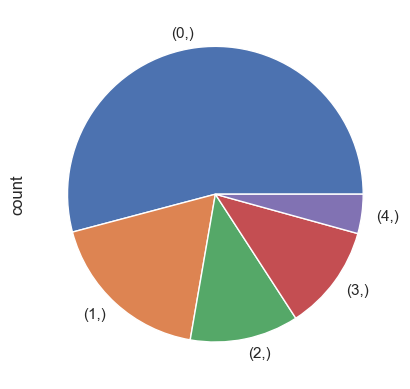

In [12]:
def map_diagnosis_to_text():
    pass

labels = y.value_counts().index

values_counts = y.value_counts()
values_counts.plot(kind='pie', labels=values_counts.index)

W przypadku większości inych badań na zbiorze danych ograniczono się jedynie do stwerdzenia istnienia choroby. Rożróznienie wartości 0 lub innej. W takim przypadku zbiór danych jest stosunkowo zbalasnowany  

# Korelacja

In [13]:
numerical_data = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
categorical_data = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].join(y)

<Axes: title={'center': 'Korelacja atrybutów zbioru danych'}>

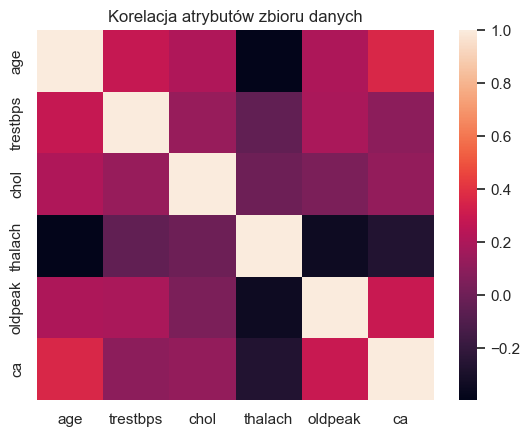

In [14]:
data = X.join(y)

plt.title("Korelacja atrybutów zbioru danych")
sns.heatmap(pd.DataFrame(numerical_data).corr())



# Rozkłady wartości ciągłych

Text(0.5, 1.0, 'Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią')

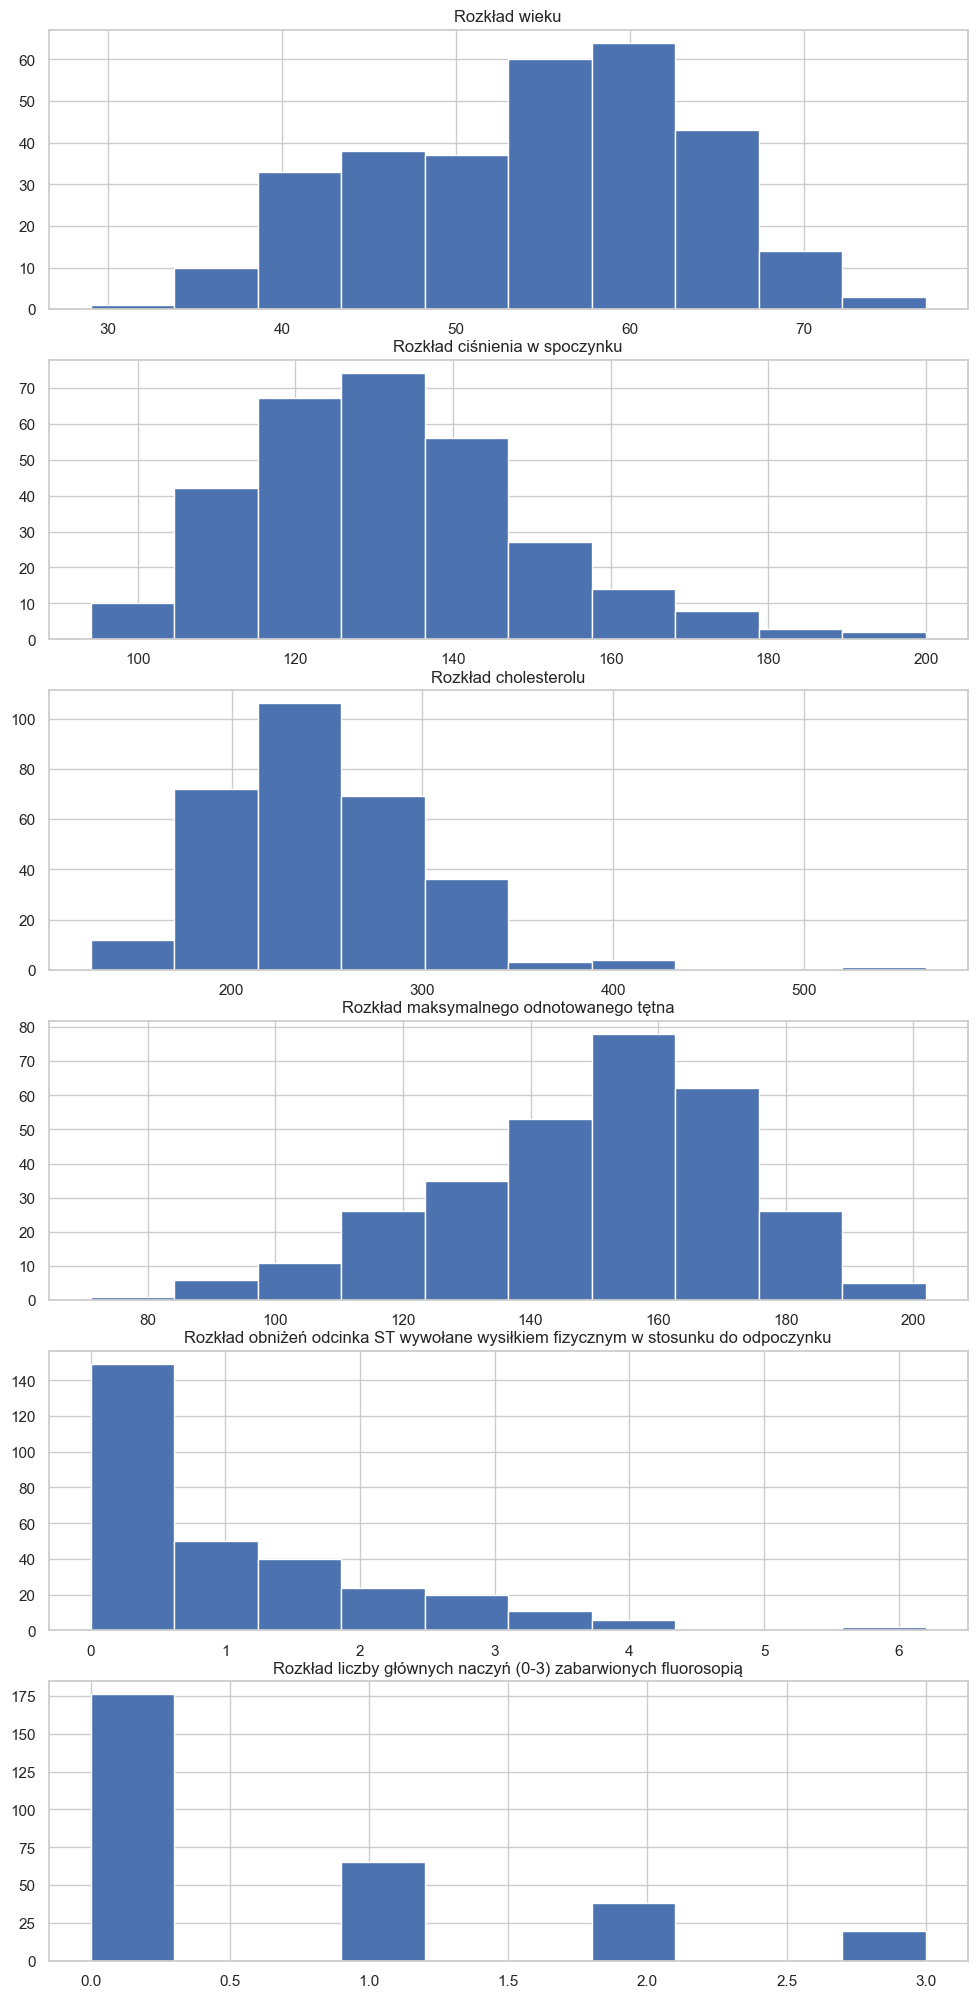

In [15]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
fig.tight_layout()
ax[0].hist(X.age)
ax[0].set_title("Rozkład wieku")
ax[1].hist(X.trestbps)
ax[1].set_title("Rozkład ciśnienia w spoczynku")
ax[2].hist(X.chol)
ax[2].set_title("Rozkład cholesterolu")
ax[3].hist(X.thalach)
ax[3].set_title("Rozkład maksymalnego odnotowanego tętna")
ax[4].hist(X.oldpeak)
ax[4].set_title("Rozkład obniżeń odcinka ST wywołane wysiłkiem fizycznym w stosunku do odpoczynku")
ax[5].hist(X.ca)
ax[5].set_title("Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią")



### Testy na rozkład normalny
Nie wzięto pod uwagi zmiennej `ca` określającą rozkład liczby naczyń w przedziale 0-3  

In [25]:
from scipy.stats import normaltest

def test_normality(data, variable_name, alpha=0.001):
    stat, p = normaltest(data)
    print('='*12)
    print('Statystyka=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'Zmienna kategoryczna "{variable_name}" jest rozkładem normalnym na poziomie istotności alpha={alpha}')
    else:
        print(f'Zmienna kategoryczna "{variable_name}" nie jest rozkładem normalnym na poziomie istotności alpha={alpha}')

for column in numerical_data.columns:
    test_normality(numerical_data[column], column)

Statystyka=8.243, p=0.016
Zmienna kategoryczna "age" nie jest rozkładem normalnym na poziomie istotności alpha=0.001
Statystyka=27.695, p=0.000
Zmienna kategoryczna "trestbps" jest rozkładem normalnym na poziomie istotności alpha=0.001
Statystyka=82.947, p=0.000
Zmienna kategoryczna "chol" jest rozkładem normalnym na poziomie istotności alpha=0.001
Statystyka=13.463, p=0.001
Zmienna kategoryczna "thalach" nie jest rozkładem normalnym na poziomie istotności alpha=0.001
Statystyka=66.620, p=0.000
Zmienna kategoryczna "oldpeak" jest rozkładem normalnym na poziomie istotności alpha=0.001
Statystyka=nan, p=nan
Zmienna kategoryczna "ca" nie jest rozkładem normalnym na poziomie istotności alpha=0.001


# Rozkłady zmiennych kategorycznych

AttributeError: 'Series' object has no attribute 'values_count'

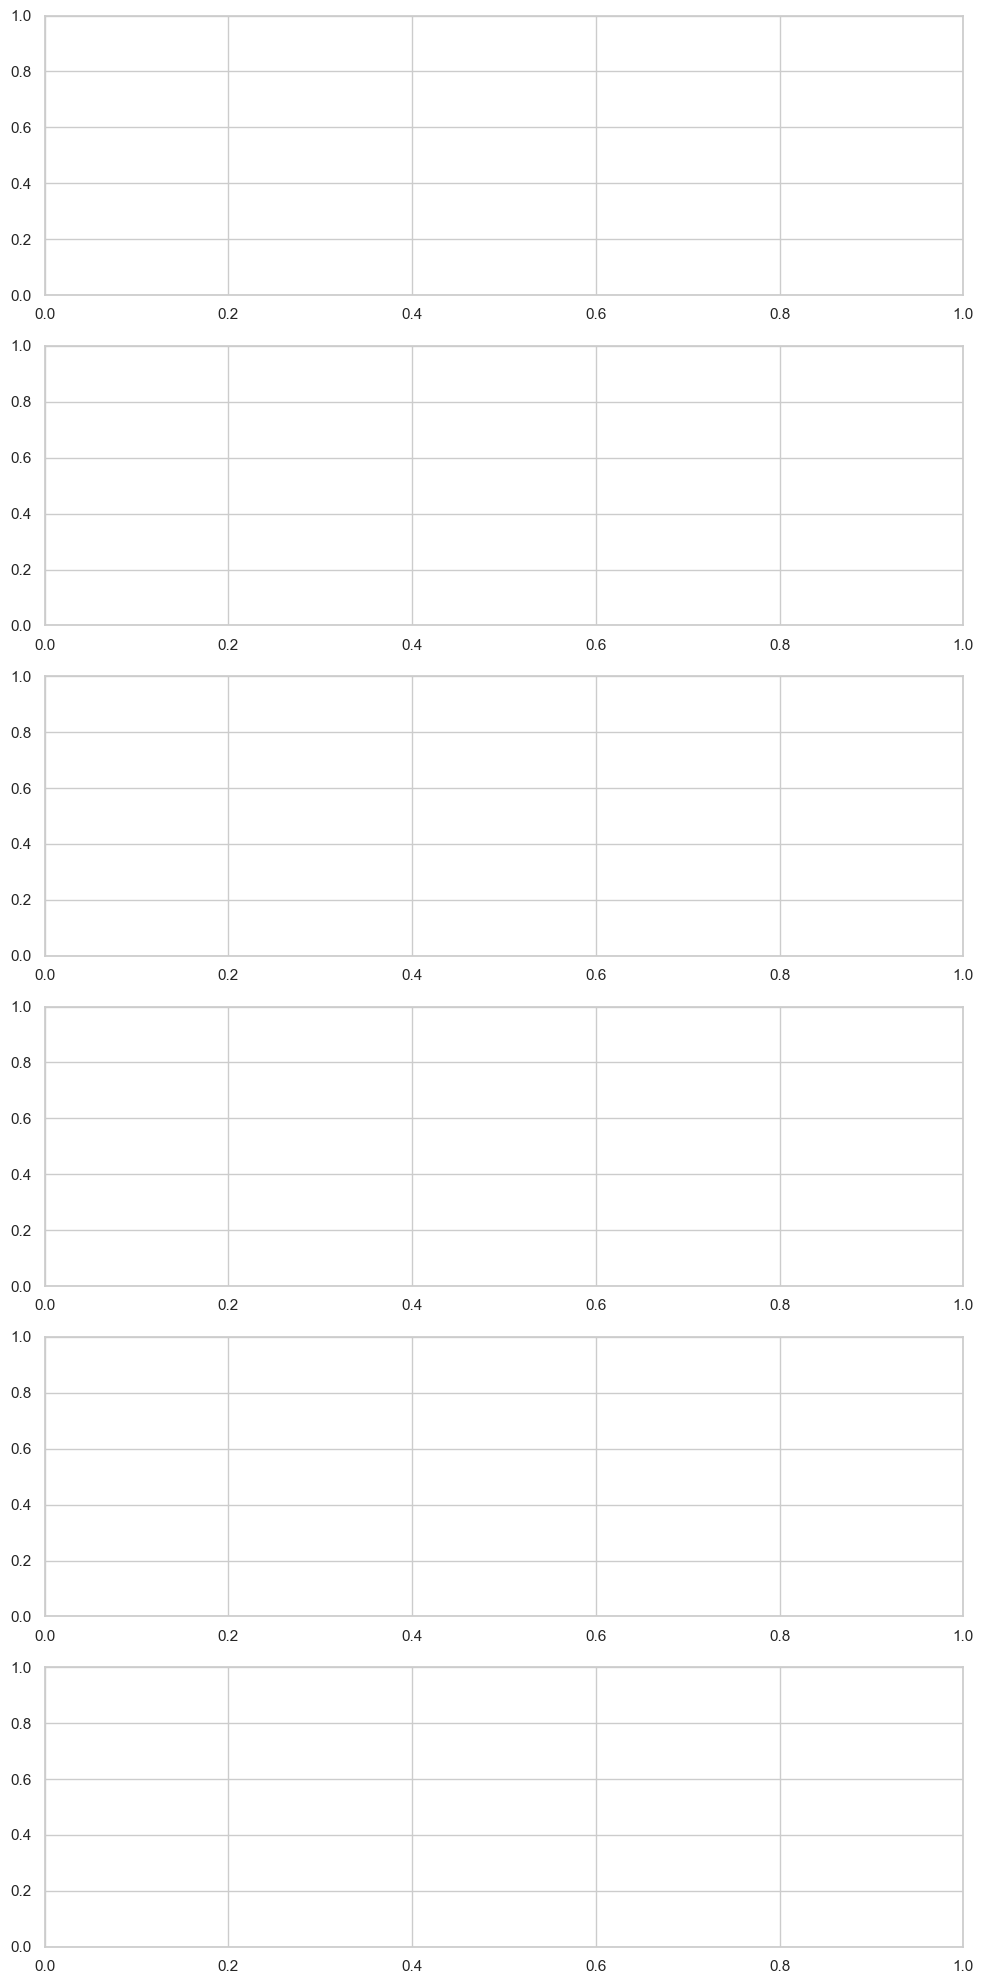

In [17]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
#categorical_data = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].join(y)
fig.tight_layout()
ax[0].pie(X.sex.values_count)
ax[0].set_title("Rozkład płci")


In [ ]:
# Rozkłady zmiennych kategorycznych

# Dane są zawierają jedynie zbiór Claveland 